## Optical Pumping Analysis


## Part 1: Resonant Frequencies

In [13]:
rb85_data = pd.read_csv('Rb85 Data.csv')
rb87_data = pd.read_csv('Rb87 Data.csv')
print(rb85_data)
print(rb87_data)

    V_offset(V)  f_res1(kHz)  f_res2(kHz)  f_res3(kHz)  f_res_avg(kHz)
0         -3.00         63.6         63.7         63.7          63.667
1         -2.50         91.9         93.5         92.5          92.633
2         -2.00        121.2        121.4        119.7         120.767
3         -1.50        149.4        149.3        149.1         149.267
4         -1.00        178.0        177.7        177.6         177.767
5         -0.50        205.5        205.8        205.6         205.633
6         -0.25        219.1        219.2        219.2         219.167
7          0.00        232.5        232.4        232.4         232.433
8          0.10        237.9        237.9        238.0         237.933
9          0.50        260.5        260.3        260.3         260.367
10         1.00        288.8        288.7        289.0         288.833
    V_offset(V)  f_res1(kHz)  f_res2(kHz)  f_res3(kHz)  f_res_avg(kHz)
0         -3.00         97.0         95.0         95.9          95.967
1     

In [14]:
#Data Cleaning and Standard Deviations

#First the rb85 data
st_dev = np.zeros(0)

i = 0
while i < len(rb85_data):
    st_dv = np.array([rb85_data.loc[i,'f_res1(kHz)'],rb85_data.loc[i,'f_res2(kHz)'],rb85_data.loc[i,'f_res3(kHz)']]).std()

    st_dev = np.append(st_dev, st_dv)
    i+=1

rb85_df = pd.DataFrame()
rb85_df['V(V)'] = rb85_data['V_offset(V)']
rb85_df['freq(kHz)'] = rb85_data['f_res_avg(kHz)']
rb85_df['freq_std(kHz)'] = st_dev

st_dev = np.zeros(0)

#Next the rb87 data
i = 0
while i < len(rb87_data):
    st_dv = np.array([rb87_data.loc[i,'f_res1(kHz)'],rb87_data.loc[i,'f_res2(kHz)'],rb87_data.loc[i,'f_res3(kHz)']]).std()

    st_dev = np.append(st_dev, st_dv)
    i+=1

rb87_df = pd.DataFrame()
rb87_df['V(V)'] = rb87_data['V_offset(V)']
rb87_df['freq(kHz)'] = rb87_data['f_res_avg(kHz)']
rb87_df['freq_std(kHz)'] = st_dev

print(rb87_df)

    V(V)  freq(kHz)  freq_std(kHz)
0  -3.00     95.967       0.817856
1  -2.50    137.667       0.309121
2  -2.00    181.567       0.694422
3  -1.50    224.567       0.659966
4  -1.00    266.967       0.124722
5  -0.50    308.367       0.286744
6  -0.25    329.133       0.124722
7   0.00    348.667       0.094281
8   0.10    357.033       0.094281
9   0.50    390.867       0.286744
10  1.00    433.667       0.124722


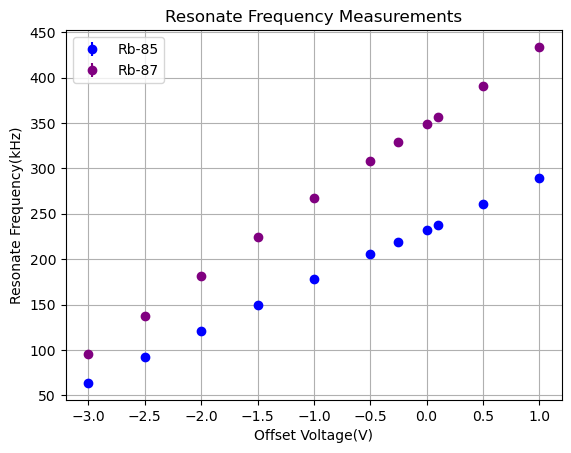

In [15]:
#Plot both isotopes
plt.title('Resonate Frequency Measurements')
plt.xlabel('Offset Voltage(V)')
plt.ylabel('Resonate Frequency(kHz)')
plt.grid()
plt.errorbar(rb85_df['V(V)'], rb85_df['freq(kHz)'], yerr = rb85_df['freq_std(kHz)'],
             fmt='o', color='blue', label='Rb-85')
plt.errorbar(rb87_df['V(V)'], rb87_df['freq(kHz)'], yerr = rb87_df['freq_std(kHz)'],
             fmt='o', color='purple', label='Rb-87')
plt.legend()
plt.show()

In [16]:
from lmfit.models import LinearModel

#Set linear model
line = LinearModel()

In [51]:
#Starting parameters for Rb85

start_params_85 = line.guess(rb85_df['freq(kHz)'], x = rb85_df['V(V)'])
Line_fit_85 = line.fit(rb85_df['freq(kHz)'], start_params_85, 
                    x = rb85_df['V(V)'], weights = 1/rb85_df['freq_std(kHz)'])

#Slope
line_slope = unc.ufloat(Line_fit_85.params['slope'].value, 
                          Line_fit_85.params['slope'].stderr)
#Intercept
rb85_int = unc.ufloat(Line_fit_85.params['intercept'].value, 
                          Line_fit_85.params['intercept'].stderr)

print('The slope is: {:.2uP} '.format(line_slope))
print('The intercept is: {:.2uP} '.format(rb85_int))

The slope is: 56.26±0.12 
The intercept is: 232.68±0.18 


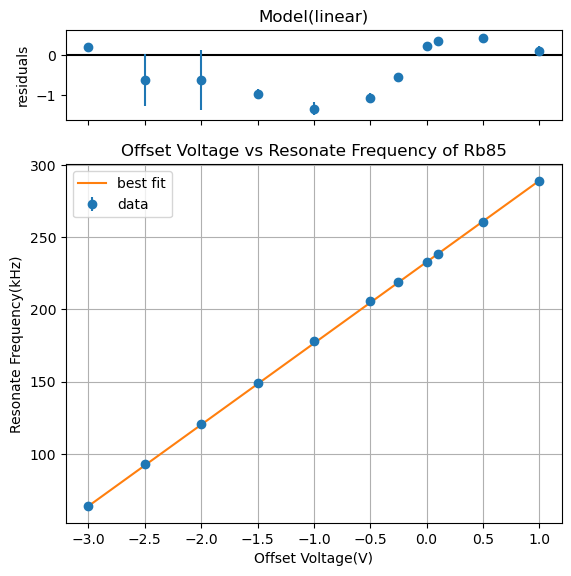

In [21]:
#Plotting
Line_fit_85.plot()
plt.title('Offset Voltage vs Resonate Frequency of Rb85')
plt.xlabel('Offset Voltage(V)')
plt.ylabel('Resonate Frequency(kHz)')
plt.grid(True)

In [52]:
#Linear model of Rb-87
start_params_87 = line.guess(rb87_df['freq(kHz)'], x = rb87_df['V(V)'])
Line_fit_87 = line.fit(rb87_df['freq(kHz)'], start_params_87, 
                    x = rb87_df['V(V)'], weights = 1/rb87_df['freq_std(kHz)'])

#Slope
line_slope = unc.ufloat(Line_fit_87.params['slope'].value, 
                          Line_fit_87.params['slope'].stderr)
#Intercept
rb87_int = unc.ufloat(Line_fit_87.params['intercept'].value, 
                          Line_fit_87.params['intercept'].stderr)

print('The slope is: {:.2uP} '.format(line_slope))
print('The intercept is: {:.2uP} '.format(rb87_int))

The slope is: 83.70±0.42 
The intercept is: 349.34±0.30 


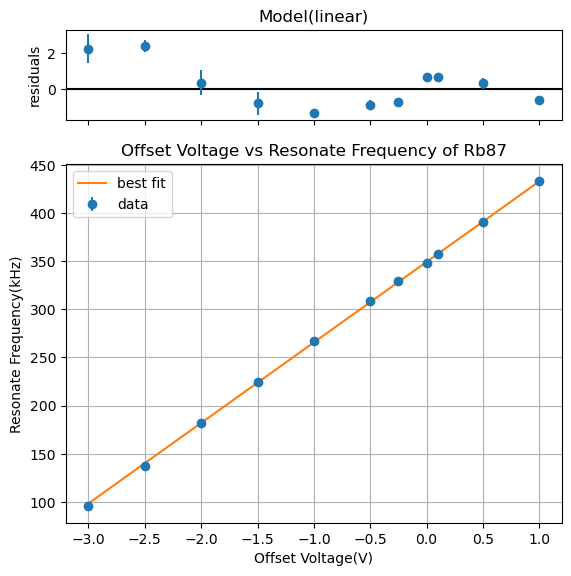

In [23]:
#Plotting
Line_fit_87.plot()
plt.title('Offset Voltage vs Resonate Frequency of Rb87')
plt.xlabel('Offset Voltage(V)')
plt.ylabel('Resonate Frequency(kHz)')
plt.grid(True)

In [24]:
# Make a fit line from these parameters
v85_fit = np.linspace(rb85_df['V(V)'].min(), rb85_df['V(V)'].max(), 100)
v87_fit = np.linspace(rb87_df['V(V)'].min(), rb85_df['V(V)'].max(), 100)

f85_fit = line.eval(start_params_85, x = v85_fit)
f87_fit = line.eval(start_params_87, x = v87_fit)

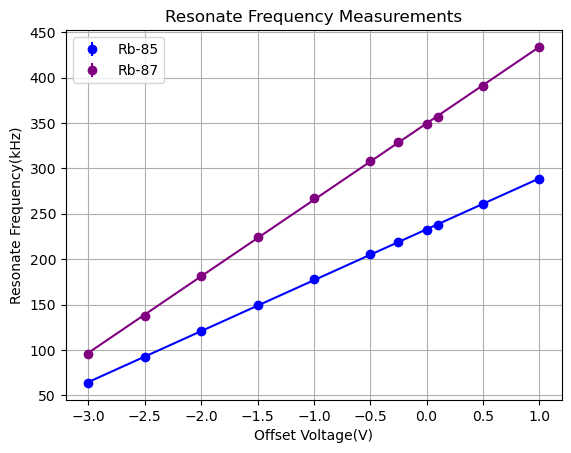

In [25]:
#Plot with their line fits

plt.title('Resonate Frequency Measurements')
plt.xlabel('Offset Voltage(V)')
plt.ylabel('Resonate Frequency(kHz)')
plt.grid()
plt.errorbar(rb85_df['V(V)'], rb85_df['freq(kHz)'], yerr = rb85_df['freq_std(kHz)'],
             fmt='o', color='blue', label='Rb-85')
#Added line fit
plt.plot(v85_fit, f85_fit, color = 'blue')
plt.errorbar(rb87_df['V(V)'], rb87_df['freq(kHz)'], yerr = rb87_df['freq_std(kHz)'],
             fmt='o', color='purple', label='Rb-87')
#Line fit
plt.plot(v87_fit, f87_fit, color = 'purple')
plt.legend()
plt.show()

## Part 2: Rabi Oscillations

In [26]:
#Data
rabi85_data = pd.read_csv('Rabi85 Data.csv')
rabi87_data = pd.read_csv('Rabi87 Data.csv')

In [27]:
#Data Cleaning and Standard Deviations

#First the rabi85 data
freq = np.zeros(0)
st_dev = np.zeros(0)

i = 0
while i < len(rabi85_data):
    T = np.array([rabi85_data.loc[i,'T_Rabi1(μs)'],rabi85_data.loc[i,'T_Rabi2(μs)'],rabi85_data.loc[i,'T_Rabi3(μs)']]).mean()
    st_dv = np.array([rabi85_data.loc[i,'T_Rabi1(μs)'],rabi85_data.loc[i,'T_Rabi2(μs)'],rabi85_data.loc[i,'T_Rabi3(μs)']]).std()

    uT = unc.ufloat(T, st_dv)
    uf = 1 / (uT*10**-3)

    freq = np.append(freq, uf.n)
    st_dev = np.append(st_dev, uf.s)
    i+=1

rabi85_df = pd.DataFrame()
rabi85_df['V(V)'] = rabi85_data['H1_amp(Vpp)']
rabi85_df['freq(kHz)'] = freq
rabi85_df['freq_std(kHz)'] = st_dev

st_dev = np.zeros(0)

#Next the rabi87 data
freq = np.zeros(0)
st_dev = np.zeros(0)

i = 0
while i < len(rabi87_data):
    T = np.array([rabi87_data.loc[i,'T_Rabi1(μs)'],rabi87_data.loc[i,'T_Rabi2(μs)'],rabi87_data.loc[i,'T_Rabi3(μs)']]).mean()
    st_dv = np.array([rabi87_data.loc[i,'T_Rabi1(μs)'],rabi87_data.loc[i,'T_Rabi2(μs)'],rabi87_data.loc[i,'T_Rabi3(μs)']]).std()

    uT = unc.ufloat(T, st_dv)
    uf = 1 / (uT*10**-3)

    freq = np.append(freq, uf.n)
    st_dev = np.append(st_dev, uf.s)
    i+=1

rabi87_df = pd.DataFrame()
rabi87_df['V(V)'] = rabi87_data['H1_amp(Vpp)']
rabi87_df['freq(kHz)'] = freq
rabi87_df['freq_std(kHz)'] = st_dev

print(rabi87_df)

   V(V)  freq(kHz)  freq_std(kHz)
0   5.5   5.660377       0.079921
1   5.0   5.338078       0.096865
2   4.5   5.067568       0.024212
3   4.0   4.823151       0.079078
4   3.5   4.504505       0.057390
5   3.0   4.021448       0.076236
6   2.5   3.759398       0.061062
7   2.0   3.571429       0.104145
8   1.5   3.348214       0.082550


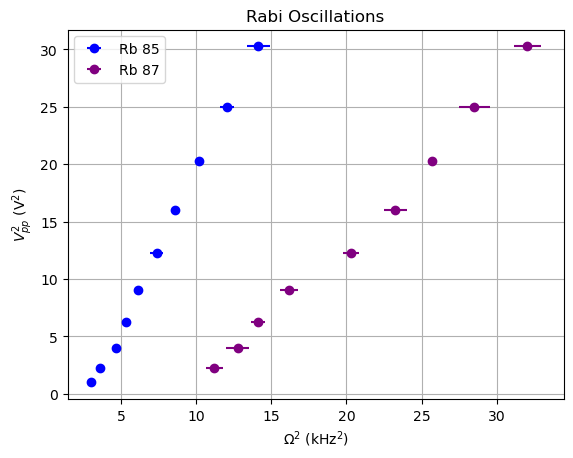

In [35]:
#Plotting the squared data

Vpp85_sq = rabi85_df['V(V)']**2
Vpp87_sq = rabi87_df['V(V)']**2

#Initializing columns
rabi85_sq_n = np.zeros(0)
rabi85_sq_s = np.zeros(0)
rabi87_sq_n = np.zeros(0)
rabi87_sq_s = np.zeros(0)

i=0
while i < len(rabi85_df):
    
    f = unc.ufloat(rabi85_df.loc[i,'freq(kHz)'], rabi85_df.loc[i,'freq_std(kHz)'])
    f = f**2
    rabi85_sq_n = np.append(rabi85_sq_n, f.n)
    rabi85_sq_s = np.append(rabi85_sq_s, f.s)
    i+=1


i=0
while i < len(rabi87_df):
    
    f = unc.ufloat(rabi87_df.loc[i,"freq(kHz)"], rabi87_df.loc[i,"freq_std(kHz)"])
    f = f**2
    rabi87_sq_n = np.append(rabi87_sq_n, f.n)
    rabi87_sq_s = np.append(rabi87_sq_s, f.s)
    i+=1

#Plot
plt.grid()
plt.title("Rabi Oscillations")
plt.ylabel("$V_{pp}^2$ (V$^2$)")
plt.xlabel(r"$\Omega^2$ (kHz$^2$)")
plt.errorbar(rabi85_sq_n, Vpp85_sq, xerr = rabi85_sq_s, fmt  ='o', color='blue', label = 'Rb 85')
plt.errorbar(rabi87_sq_n, Vpp87_sq, xerr = rabi87_sq_s, fmt = 'o', color='purple', label = 'Rb 87')
plt.legend()
plt.show()

In [37]:
#Creating a fit from the rabi oscillations for each isotope
params_rabi85 = line.guess(Vpp85_sq, x = rabi85_sq_n)
Line_fit_rabi85 = line.fit(rabi85_df['freq(kHz)'], params_rabi85, 
                    x = rabi85_df['V(V)'], weights = 1/rabi85_df['freq_std(kHz)'])

#Slope
line_slope = unc.ufloat(Line_fit_rabi85.params['slope'].value, 
                          Line_fit_rabi85.params['slope'].stderr)
#Intercept
line_intercept = unc.ufloat(Line_fit_rabi85.params['intercept'].value, 
                          Line_fit_rabi85.params['intercept'].stderr)

print('The slope is: {:.2uP} '.format(line_slope))
print('The intercept is: {:.2uP} '.format(line_intercept))

The slope is: 0.420±0.010 
The intercept is: 1.284±0.028 


Text(0, 0.5, "'$V_{pp}^2$ (V$^2$)")

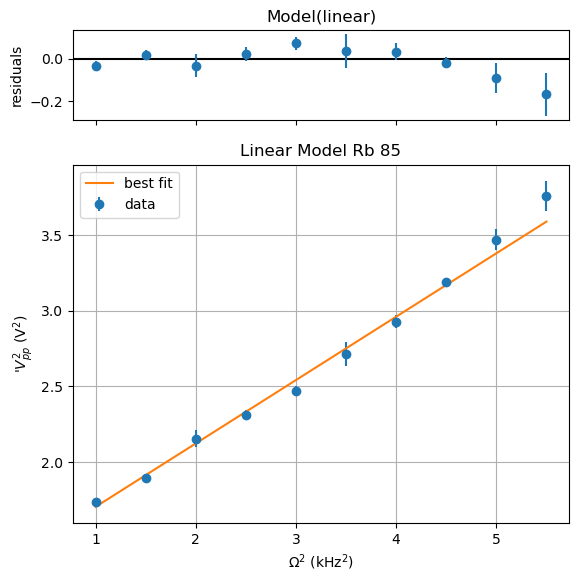

In [41]:
#Plot
Line_fit_rabi85.plot()
plt.grid(True)
plt.title("Linear Model Rb 85")
plt.xlabel(r"$\Omega^2$ (kHz$^2$)")
plt.ylabel("'$V_{pp}^2$ (V$^2$)")

In [40]:
params_rabi87 = line.guess(Vpp87_sq, x = rabi87_sq_n)
Line_fit_rabi87 = line.fit(rabi87_df['freq(kHz)'], params_rabi87, 
                    x = rabi87_df['V(V)'], weights = 1/rabi87_df['freq_std(kHz)'])

#Slope
line_slope = unc.ufloat(Line_fit_rabi87.params['slope'].value, 
                          Line_fit_rabi87.params['slope'].stderr)
#Intercept
line_intercept = unc.ufloat(Line_fit_rabi87.params['intercept'].value, 
                          Line_fit_rabi87.params['intercept'].stderr)

print('The slope is: {:.2uP} '.format(line_slope))
print('The intercept is: {:.2uP} '.format(line_intercept))

The slope is: 0.609±0.020 
The intercept is: 2.323±0.081 


Text(0, 0.5, "'$V_{pp}^2$ (V$^2$)")

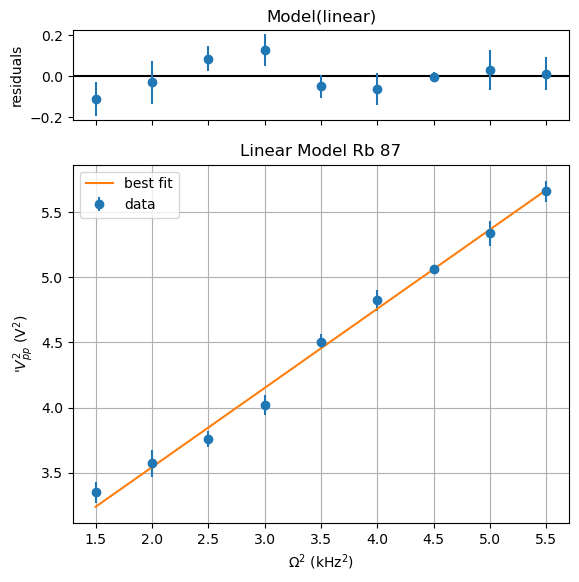

In [42]:
#Plot
Line_fit_rabi87.plot()
plt.grid(True)
plt.title("Linear Model Rb 87")
plt.xlabel(r"$\Omega^2$ (kHz$^2$)")
plt.ylabel("'$V_{pp}^2$ (V$^2$)")

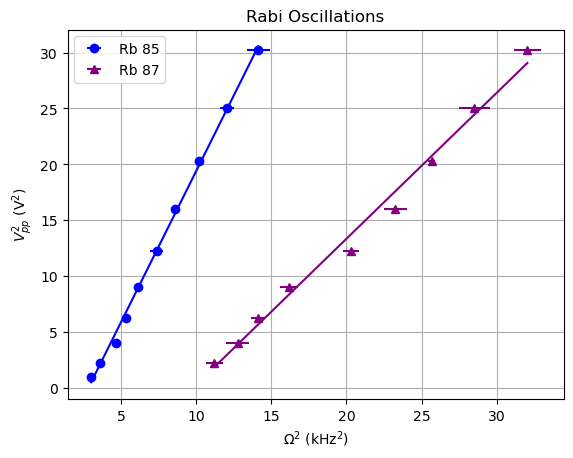

In [47]:
#Creating lines for the fits and then plotting
rabi85_sq_fit = np.linspace(rabi85_sq_n.min(), rabi85_sq_n.max(), 100)
rabi87_sq_fit = np.linspace(rabi87_sq_n.min(), rabi87_sq_n.max(), 100)
Vpp85_sq_fit = line.eval(params_rabi85, x = rabi85_sq_fit)
Vpp87_sq_fit = line.eval(params_rabi87, x = rabi87_sq_fit)

plt.title("Rabi Oscillations")
plt.grid()
plt.xlabel(r"$\Omega^2$ (kHz$^2$)")
plt.ylabel("$V_{pp}^2$ (V$^2$)")

plt.errorbar(rabi85_sq_n, Vpp85_sq, xerr = rabi85_sq_s, fmt = 'o', color='blue', label='Rb 85')
plt.errorbar(rabi87_sq_n, Vpp87_sq, xerr = rabi87_sq_s, fmt='^', color='purple', label='Rb 87')

plt.plot(rabi85_sq_fit, Vpp85_sq_fit, color='blue')
plt.plot(rabi87_sq_fit, Vpp87_sq_fit, color='purple')
plt.legend()
plt.show()


## G factor calculations

In [28]:
#Theoretical Method

#Define variables for each momentum
S = 1/2
L = 0
J = 1/2
i85 = 5/2
i87 = 3/2
f85 = 3
f87 = 2

#gJ_factor

def gJ_factor(S, L, J):

    gJ =  1 + (J*(J+1) + S*(S+1) - L*(L+1))/(2*J * (J+1))
    return gJ

#gF_factor

def gF_factor(gJ, J, I, F):
    
    gF = gJ*((F*(F+1) + J*(J+1) - I*(I+1))/(2*F * (F+1)))

    return gF

#Call functions
gJ = gJ_factor(S,L,J)

gF_85 = gF_factor(gJ, J, i85, f85)
gF_87 = gF_factor(gJ, J, i87, f87)

print("The theoretical gF for Rb85 is: {:.2g}".format(gF_85))
print("The theoretical gF for Rb87 is: {:.2g}".format(gF_87))

The theoretical gF for Rb85 is: 0.33
The theoretical gF for Rb87 is: 0.5


In [32]:
#Offset Method

#Turn Gauss into Tesla
H0 = unc.ufloat(0.494, 0.066)*(10**-4)
#Bohr Magneton
b_magneton = (const.e*const.hbar)/(2.0*const.m_e)

i85 = rb85_df.index[rb85_df["V(V)"]==0].tolist()[0]
i87 = rb87_df.index[rb87_df["V(V)"]==0].tolist()[0]
#Go from kHz to Hz
nu_F_85 = unc.ufloat(rb85_df.loc[i85,'freq(kHz)'], rb85_df.loc[i85,'freq_std(kHz)'])*(10**3) 
nu_F_87 = unc.ufloat(rb87_df.loc[i87,'freq(kHz)'], rb87_df.loc[i87,'freq_std(kHz)'])*(10**3)



dm_F = 1.0
gF_offset_85 = (const.h*nu_F_85)/(b_magneton*H0*dm_F)
gF_offset_87 = (const.h*nu_F_87)/(b_magneton*H0*dm_F)

print("Using the offset method, the gF for Rb85 is: {:.2uP}".format(gF_offset_85))
print("Using the offset method, the gF for Rb87 is: {:.2uP}".format(gF_offset_87))

Using the offset method, the g_F for Rb85 is: 0.336±0.045
Using the offset method, the g_F for Rb87 is: 0.504±0.067


In [34]:
#Rabi Max Frequency Response Method

#Converting to Hz
rabi_freq_85 = 234.8*10**3
rabi_freq_87 = 352.8*10**3

gJ_rabi1_85 = (const.h*rabi_freq_85)/(b_magneton*H0)
gJ_rabi1_87 = (const.h*rabi_freq_87)/(b_magneton*H0)

print("Using this method, the gF for Rb85 is: {:.2g}".format(gJ_rabi1_85))
print("Using this method, the gF for Rb87 is: {:.2g}".format(gJ_rabi1_87))

Using this method, the gF for Rb85 is: 0.34+/-0.05
Using this method, the gF for Rb87 is: 0.51+/-0.07


In [54]:
#Rabi Frequency vs H1 Amplitude Method

#Converting to Hz
omega_85 = 232.8*(10**3)
omega_87 = 350.8*(10**3)
detuning85 = unp.sqrt(rb85_int)*(10**3)
detuning87 = unp.sqrt(rb87_int)*(10**3)

omega0_85 = omega_85 - detuning85
omega0_87 = omega_87 - detuning87

gJ_rabi2_85 = (const.h*omega0_85)/(b_magneton*H0)
gJ_rabi2_87 = (const.h*omega0_87)/(b_magneton*H0)

print("Using this method, the gF for Rb85 is: {:.2g}".format(gJ_rabi2_85))
print("Using this method, the gF for Rb87 is: {:.2g}".format(gJ_rabi2_87))


Using this method, the gF for Rb85 is: 0.31+/-0.04
Using this method, the gF for Rb87 is: 0.48+/-0.06
